<a href="https://colab.research.google.com/github/Leo2411534/test/blob/main/eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Loading Data**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('/content/sample_data/Custom_data/exercise_data.csv')
#TO READ FIVE RANDOM VALUES
data.head()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#TO READ THE LAST 5 ROWS
data.tail()

In [ ]:
#INFORMTION ABOUT THE DATA
data.info()

In [ ]:
#describe data
data.describe()

In [ ]:
data.isnull().sum()

In [ ]:
(data.isnull().sum()/(len(data)))*100

In [ ]:
#To know how many rows and columns
data.shape

**DATA REDUCCION**

In [ ]:
#removing the pulse column
data.drop(['Pulse'], axis=1)

In [ ]:
data.shape

**Working with Date & Time**

In [ ]:
from datetime import date
print(date.today().year)
print(date.today().month)
print(date.today())
# Is it 23 of jan ?

2025
1
2025-01-23


In [ ]:
from datetime import datetime
current_time = datetime.now()
print(current_time)

print('Current Time:', current_time.strftime('%H:%M:%S'))

In [ ]:
#Calculate the difference between Pulse & MaxPulse and store it in a new column "DifferenceOfPulse"
data['Differenceofpulse'] = data['Maxpulse']-data['Pulse']
data = data.drop(['Differenceofpulse'], axis=1)
data.head()

**[Handling missing values] Different of handling missing values:**

1. Mean
2. Mode
3. Median
4. Drop those row

In [ ]:
data['Calories'] = data['Calories'].fillna(data['Calories'].mean())
print('Mean of MaxPulse is:', data['Maxpulse'].mean())
print('Mean of MaxPulse is:', data['Maxpulse'].median())
print('Mean of MaxPulse is:', data['Maxpulse'].mode())

#Mean of calories
print('Mean of Calories is:', data['calories'].mean())

In [ ]:
data.head(20)

In [ ]:
data.isnull().sum()

In [ ]:
data_cleaned = data.dropna()
#all the rows of all the columns those contain null values


In [ ]:
data_cleaned.shape

In [ ]:
data = data.dropna(subset=['Calories'])
#delete null rows from calories columns only
print(data.isnull().sum())
print(data.shape)

In [ ]:
import pandas as pd
import numpy as np

#Creating Data Frame
tempData = pd.DataFrame({
    'Age': [25, 30, np.nan, 35, 40],
    'Salary': [50000, 60000, 55000, np.nan, 65000],
    'City': ['New York', 'San Francisco', np.nan, 'Chicago', 'New York'],


})
def fill_missing_values(df):
    df['Age'] = df['Age'].fillna(df['Age'].mean())  # Fill Age with mean
    df['Salary'] = df['Salary'].fillna(df['Salary'].median())  # Fill Salary with median
    df['City'] = df['City'].fillna(df['City'].mode()[0])  # Fill City with mode
    return df

tempData = fill_missing_values(tempData)

print(tempData)
#Question: Fill the missing values, for age -> use mean, for Salary: use median, for city use mode:


    Age   Salary           City
0  25.0  50000.0       New York
1  30.0  60000.0  San Francisco
2  32.5  55000.0       New York
3  35.0  57500.0        Chicago
4  40.0  65000.0       New York


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

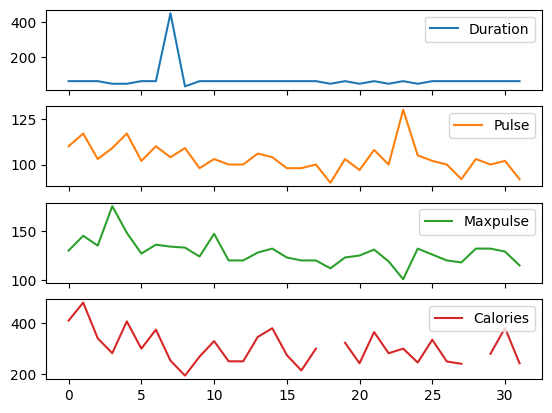

In [ ]:
data.plot(kind='line', subplots = True)

<Axes: >

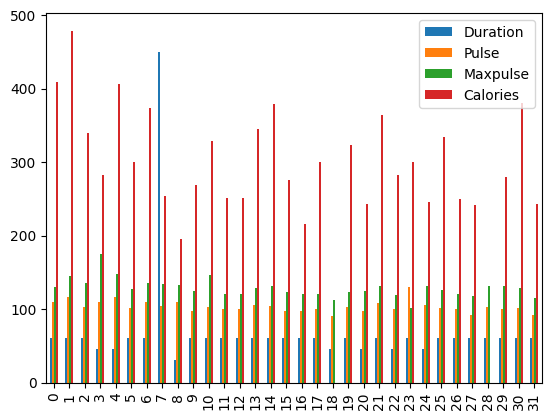

In [ ]:
data.plot(kind='bar')

<Axes: >

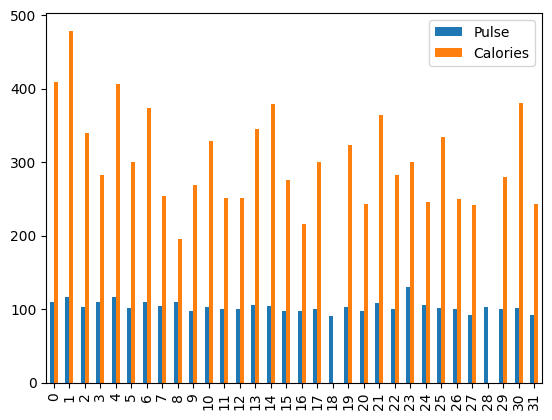

In [ ]:
barData = data[['Pulse', 'Calories']]
barData.plot(kind='bar')

In [ ]:
#Calculate de difference between pulse & Maxpulse and store it in new column 'Difference of pulse'
data['Differenceofpulse'] = data['Maxpulse']-data['Pulse']
#data = data.drop(['Differenceofpulse'], axis=1)
data.head()

In [ ]:
data.plot(kind='scatter', x='Pulse', y='Maxpulse', alpha=0.6)
plt.title('Pulse vs Maxpulse')
plt.show()

Correlation Matrix:
                   Duration     Pulse  Maxpulse  Calories  Differenceofpulse
Duration           1.000000  0.004410  0.049959 -0.114169           0.046612
Pulse              0.004410  1.000000  0.276583  0.513186          -0.321259
Maxpulse           0.049959  0.276583  1.000000  0.357460           0.821194
Calories          -0.114169  0.513186  0.357460  1.000000           0.053285
Differenceofpulse  0.046612 -0.321259  0.821194  0.053285           1.000000


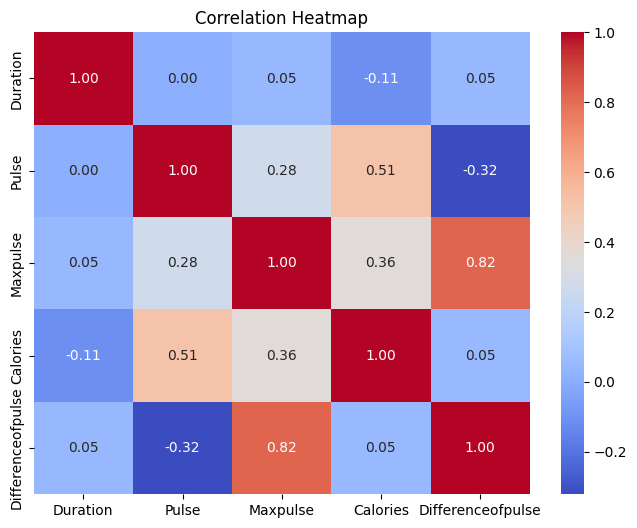

In [ ]:
numerical_data = data.drop(columns=['Date'])
numerical_data.head()

# Generate the correlation matrix
correlation_matrix = numerical_data.corr()
print("Correlation Matrix:")
print(correlation_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Correlation Heatmap')
plt.show()


Correlation Matrix:
          Duration     Pulse  Maxpulse  Calories
Duration  1.000000  0.004410  0.049959 -0.114169
Pulse     0.004410  1.000000  0.276583  0.513186
Maxpulse  0.049959  0.276583  1.000000  0.357460
Calories -0.114169  0.513186  0.357460  1.000000


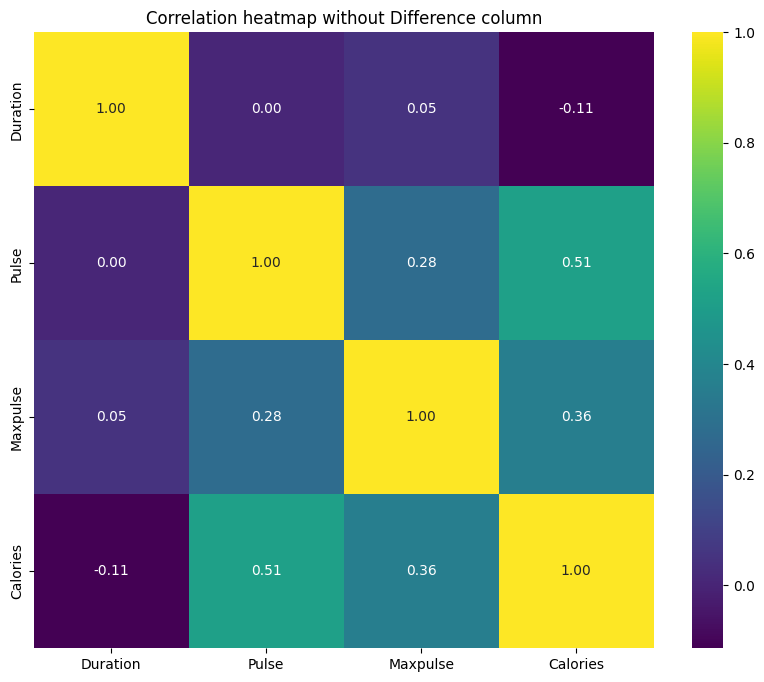

In [ ]:
numerical_data = data.drop(columns=['Date', 'Differenceofpulse']) # Drop 'Differenceof pulse' column here
numerical_data.head()

correlation_matrix = numerical_data.corr()
print("Correlation Matrix:")
print(correlation_matrix)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title("Correlation heatmap without Difference column")
plt.show()